# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metrics"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=640a70a6129d5a91e4f8251f720a9800&units=metrics&q=


In [4]:
response=requests.get(query_url+"new york")
json=response.json()
print(json)
# print(json['main']['temp_max'])


{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 287.71, 'pressure': 1031, 'humidity': 38, 'temp_min': 285.93, 'temp_max': 289.26}, 'visibility': 16093, 'wind': {'speed': 2.1}, 'clouds': {'all': 1}, 'dt': 1570299000, 'sys': {'type': 1, 'id': 5141, 'message': 0.0137, 'country': 'US', 'sunrise': 1570272969, 'sunset': 1570314749}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [5]:
city_data = []
city_counter = 0
set_counter = 1
for city in cities:
    json = requests.get(query_url + city).json()
    city_counter = city_counter + 1
    try:
        tempmax=json['main']['temp_max']
        humidity=json['main']["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
    except:
        print("City not found skipping...")
    if city_counter == 50:
        city_counter = 0
        set_counter = set_counter + 1
    city_data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
    #        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
    print(f"Processing Record {city_counter} of set {set_counter} || {city}")
    time.sleep(.1)
#len(city_data)

Processing Record 1 of set 1 || hobart
Processing Record 2 of set 1 || severo-kurilsk
Processing Record 3 of set 1 || vardo
Processing Record 4 of set 1 || ledyard
Processing Record 5 of set 1 || berlevag
Processing Record 6 of set 1 || ilulissat
Processing Record 7 of set 1 || kaitangata
Processing Record 8 of set 1 || jamestown
Processing Record 9 of set 1 || sitka
Processing Record 10 of set 1 || alofi
Processing Record 11 of set 1 || hilo
Processing Record 12 of set 1 || touros
Processing Record 13 of set 1 || saint george
Processing Record 14 of set 1 || albany
Processing Record 15 of set 1 || beringovskiy
Processing Record 16 of set 1 || bud
Processing Record 17 of set 1 || rikitea
Processing Record 18 of set 1 || hofn
Processing Record 19 of set 1 || rabo de peixe
Processing Record 20 of set 1 || chernihiv
City not found skipping...
Processing Record 21 of set 1 || samusu
Processing Record 22 of set 1 || thompson
Processing Record 23 of set 1 || porto novo
Processing Record 24 o

Processing Record 35 of set 4 || mayo
Processing Record 36 of set 4 || acajutla
City not found skipping...
Processing Record 37 of set 4 || marcona
Processing Record 38 of set 4 || novomikhaylovskiy
Processing Record 39 of set 4 || khandyga
Processing Record 40 of set 4 || le pradet
Processing Record 41 of set 4 || los llanos de aridane
Processing Record 42 of set 4 || bintulu
City not found skipping...
Processing Record 43 of set 4 || grand river south east
Processing Record 44 of set 4 || inirida
City not found skipping...
Processing Record 45 of set 4 || olafsvik
Processing Record 46 of set 4 || xai-xai
Processing Record 47 of set 4 || cayenne
Processing Record 48 of set 4 || arraial do cabo
Processing Record 49 of set 4 || cartagena
Processing Record 0 of set 5 || upernavik
Processing Record 1 of set 5 || dikson
Processing Record 2 of set 5 || anadyr
Processing Record 3 of set 5 || chara
Processing Record 4 of set 5 || faanui
Processing Record 5 of set 5 || makakilo city
Processing

Processing Record 20 of set 8 || serenje
Processing Record 21 of set 8 || astoria
Processing Record 22 of set 8 || tarauaca
Processing Record 23 of set 8 || oliveira dos brejinhos
Processing Record 24 of set 8 || kiama
City not found skipping...
Processing Record 25 of set 8 || tambul
Processing Record 26 of set 8 || praia da vitoria
Processing Record 27 of set 8 || ewa beach
Processing Record 28 of set 8 || ketchikan
Processing Record 29 of set 8 || methoni
Processing Record 30 of set 8 || soure
City not found skipping...
Processing Record 31 of set 8 || vaitupu
Processing Record 32 of set 8 || maniitsoq
Processing Record 33 of set 8 || mitzic
Processing Record 34 of set 8 || susangerd
Processing Record 35 of set 8 || iwaki
Processing Record 36 of set 8 || nantucket
Processing Record 37 of set 8 || kachug
Processing Record 38 of set 8 || burns lake
Processing Record 39 of set 8 || luena
Processing Record 40 of set 8 || turukhansk
Processing Record 41 of set 8 || barisal
Processing Rec

Processing Record 7 of set 12 || alekseyevsk
Processing Record 8 of set 12 || buston
Processing Record 9 of set 12 || vila velha
Processing Record 10 of set 12 || morehead
Processing Record 11 of set 12 || bonthe
City not found skipping...
Processing Record 12 of set 12 || doctor pedro p. pena
Processing Record 13 of set 12 || ardmore
Processing Record 14 of set 12 || winsum
Processing Record 15 of set 12 || boende
Processing Record 16 of set 12 || ruteng
Processing Record 17 of set 12 || isangel
Processing Record 18 of set 12 || san vicente
Processing Record 19 of set 12 || port moresby
Processing Record 20 of set 12 || straumen
Processing Record 21 of set 12 || qianjiang
Processing Record 22 of set 12 || malumfashi
Processing Record 23 of set 12 || yarmouth
Processing Record 24 of set 12 || honningsvag
Processing Record 25 of set 12 || brainerd
City not found skipping...
Processing Record 26 of set 12 || bac lieu
Processing Record 27 of set 12 || westport
Processing Record 28 of set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df=pd.DataFrame(city_data)
weather_df.columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Temp", "Wind Speed"]                      
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
0,hobart,90,AU,1570299010,62,-42.88,147.33,285.15,3.100
1,severo-kurilsk,100,RU,1570299011,95,50.68,156.12,280.50,18.340
2,vardo,75,US,1570299011,51,39.62,-77.74,291.15,5.100
3,ledyard,0,US,1570299011,38,41.44,-72.02,288.71,2.100
4,berlevag,100,NO,1570299011,73,70.86,29.09,278.60,4.900
5,ilulissat,75,GL,1570299012,75,69.22,-51.10,278.15,4.100
6,kaitangata,52,NZ,1570299012,76,-46.28,169.85,277.04,1.790
7,jamestown,0,AU,1570298836,71,-33.21,138.60,285.70,2.620
8,sitka,27,US,1570299013,37,37.17,-99.65,293.71,8.490
9,alofi,59,NU,1570299013,73,-19.06,-169.92,294.15,4.600


In [8]:
weather_df.to_csv("output_data/worldcityweather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

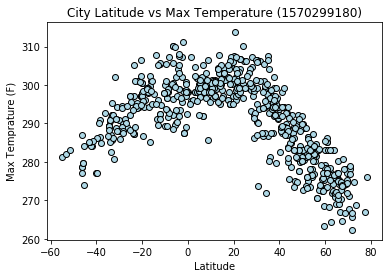

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Temp"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

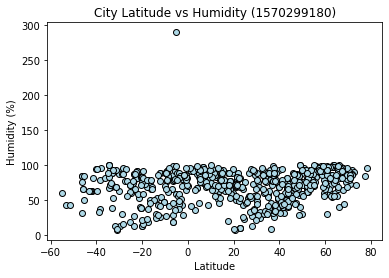

In [13]:
plt.scatter(weather_df["Lat"],weather_df['Humidity'],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

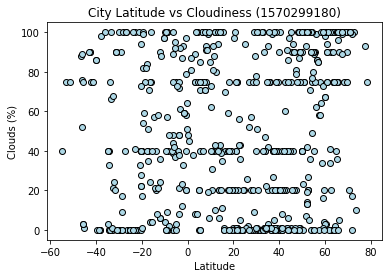

In [14]:
plt.scatter(weather_df["Lat"],weather_df['Cloudiness'],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Clouds (%)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

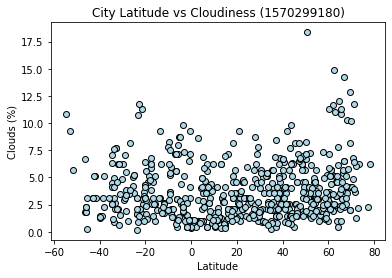

In [15]:
plt.scatter(weather_df["Lat"],weather_df['Wind Speed'],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Clouds (%)")
plt.xlabel("Latitude")

## Linear Regression

In [112]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression